# Importing Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.columns

Index(['User_ID', 'Description', 'Browser_Used', 'Device_Used', 'Is_Response'], dtype='object')

In [5]:
df

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy
5,id10331,We had - rooms. One was very nice and clearly ...,InternetExplorer,Desktop,happy
6,id10332,My husband and I have stayed in this hotel a f...,Firefox,Tablet,not happy
7,id10333,My wife & I stayed in this glorious city a whi...,Google Chrome,Mobile,happy
8,id10334,My boyfriend and I stayed at the Fairmont on a...,Internet Explorer,Desktop,happy
9,id10335,"Wonderful staff, great location, but it was de...",Chrome,Tablet,not happy


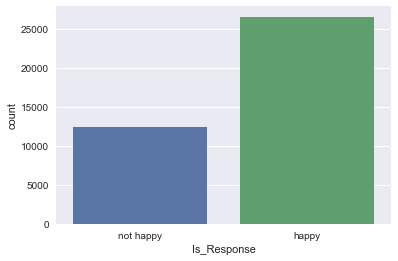

In [6]:
sns.countplot(x='Is_Response',data=df)

# Preprocessing 

In [101]:
import re
from nltk.tokenize import word_tokenize,TreebankWordTokenizer,PunktSentenceTokenizer,RegexpTokenizer
from nltk.corpus import stopwords,wordnet
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

In [102]:
replacement_patterns = [
     (r'won\'t', 'will not'),
     (r'can\'t', 'cannot'),
     (r'i\'m', 'i am'),
     (r'ain\'t', 'is not'),
     (r'(\w+)\'ll', '\g<1> will'),
     (r'(\w+)n\'t', '\g<1> not'),
     (r'(\w+)\'ve', '\g<1> have'),
     (r'(\w+)\'s', '\g<1> is'),
     (r'(\w+)\'re', '\g<1> are'),
     (r'(\w+)\'d', '\g<1> would')
]

class RegexpReplacer(object):
    def __init__(self, patterns=replacement_patterns):
        self.patterns = [(re.compile(regex), repl) for (regex, repl) in
         patterns]
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

class AntonymReplacer(object):
    def replace(self, word, pos=None):
        antonyms = set()
        for syn in wordnet.synsets(word, pos=pos):
            for lemma in syn.lemmas():
                for antonym in lemma.antonyms():
                    antonyms.add(antonym.name())
        if len(antonyms) == 1:
            return antonyms.pop()
        else:
            return None
        
    def replace_neg(self, sent):
        i, sem_len = 0, len(sent)
        words = []
        while i < sem_len:
            word = sent[i]
            if word == 'not' and i+1 < sem_len:
                ant = self.replace(sent[i+1])
                if ant:
                    words.append(ant)
                    i += 2
                    continue
            words.append(word)
            i += 1
        return words
                

In [103]:
doc = df['Description'][2]
doc

'I booked this hotel through Hotwire at the lowest price I could find. When we got there the front desk manager gave us a """"""""""""""""""""""""""""""""smoking"""""""""""""""""""""""""""""""" room. I argued that I have a little baby and I would not have booked the room had I known it was smoking. The manager would not hear anything further and told me that Hotwire books the cheapest rooms that are available. So, from the get go I was very unhappy.\nAfter a great deal of persuasion and discussion, I got a nonsmoking room. Thereafter the room had the most minimal amenities. Besides the great location (near Dupont Circle), there was not much to say about this overpriced hotel. The room was small and in OK condition. The bathroom was small with a tub. The bathroom amenities were also minimal. We did not have a fridge or a microwave and had to again rent a fridge from the staff (to keep baby things).\nThe parking costs $-- per day so it is best not to drive here. Also the breakfast is not

In [104]:
def replacement(doc):
    replacer = RegexpReplacer()
    An_replacer = AntonymReplacer()
    tokenizer = RegexpTokenizer("[\w']+")
    sent = tokenizer.tokenize(replacer.replace(doc))
    sent = An_replacer.replace_neg(sent)
    toc_doc = [word.lower() for word in sent]
    stoplist = set(stopwords.words('english'))
    rem_toc_doc = [word for word in toc_doc if word not in stoplist]
    return rem_toc_doc

In [105]:
rep_doc = replacement(doc)

In [110]:
def tokenize(document): 
    lemmy = []
    for token, tag in pos_tag(document):
        lemma = lemmatize(token, tag)
        lemmy.append(lemma)
    return lemmy

def lemmatize(token, tag):
    tag = {
          'N': wordnet.NOUN,
          'V': wordnet.VERB,
          'R': wordnet.ADV,
          'J': wordnet.ADJ
    }.get(tag[0], wordnet.NOUN)
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(token, tag)

In [111]:
df['Replacement'] = df['Description'].apply(replacement)

In [112]:
df['Lemmatization'] = df['Replacement'].apply(tokenize)

In [113]:
df.to_csv('Script2data.csv',index=False)